In [1]:
#library import
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.stattools import durbin_watson
from IPython.display import display
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

data_dir='C:/Users/kdh2/BIGCON/data/total'
data_list = os.listdir(data_dir)


#항목별 저장
data_list_single_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인타자')]
data_single_hitter = [pd.read_csv(os.path.join(data_dir, data_list_single_hitter[x]), encoding='cp949') for x in range(len(data_list_single_hitter))]
data_list_single_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인투수')]
data_single_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_single_pitcher[x]), encoding='cp949') for x in range(len(data_list_single_pitcher))]
data_list_games = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('경기')]
data_games = [pd.read_csv(os.path.join(data_dir, data_list_games[x]), encoding='cp949') for x in range(len(data_list_games))]
data_list_player_enroll = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('등록선수')]
data_player_enroll = [pd.read_csv(os.path.join(data_dir, data_list_player_enroll[x]), encoding='cp949') for x in range(len(data_list_player_enroll))]
data_list_players = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('선수')]
data_players = [pd.read_csv(os.path.join(data_dir, data_list_players[x]), encoding='cp949') for x in range(len(data_list_players))]
data_list_teams = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀')]
data_teams = [pd.read_csv(os.path.join(data_dir, data_list_teams[x]), encoding='cp949') for x in range(len(data_list_teams))]
data_list_team_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀타자')]
data_team_hitter = [pd.read_csv(os.path.join(data_dir, data_list_team_hitter[x]), encoding='cp949') for x in range(len(data_list_team_hitter))]
data_list_team_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀투수')]
data_team_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_team_pitcher[x]), encoding='cp949') for x in range(len(data_list_team_pitcher))]


team=pd.concat(data_team_hitter,axis=0)
for i in range(0,5):
    data_team_hitter[i]['AVG']=data_team_hitter[i]['HIT']/data_team_hitter[i]['AB']
    data_team_hitter[i]['year']=data_team_hitter[i]['G_ID'].apply(lambda x: int(x[:4]))
    data_team_hitter[i]['month']=data_team_hitter[i]['G_ID'].apply(lambda x: int(x[4:6]))  


team['AVG']=team['HIT']/team['AB']
team['year']=team['G_ID'].apply(lambda x: int(x[:4]))
team['month']=team['G_ID'].apply(lambda x: int(x[4:6]))

In [43]:
hitter_2016=data_single_hitter[0]
hitter_2017=data_single_hitter[1]
hitter_2018=data_single_hitter[2]
hitter_2019=data_single_hitter[3]
hitter_2020=data_single_hitter[4]
hitter_all=pd.concat([hitter_2016,hitter_2017,hitter_2018,hitter_2019,hitter_2020])
hitter_all['AVG']=hitter_all['HIT']/hitter_all['AB']

In [8]:
hitter_2016.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
       'START_CK', 'BAT_ORDER_NO', 'PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3',
       'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'ERR',
       'LOB', 'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN'],
      dtype='object')

In [9]:
hitter_2016[hitter_2016['BAT_ORDER_NO']==4]

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,BAT_ORDER_NO,PA,...,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
14,20160401HHLG0,20160401,HH,LG,0,T,71752,1,4,6,...,0,0,0,1,0,0,2,0.25,4,1
21,20160401HHLG0,20160401,LG,HH,0,B,76100,1,4,5,...,0,0,0,2,0,0,2,0.50,2,1
34,20160401HTNC0,20160401,HT,NC,0,T,64699,1,4,4,...,0,0,0,0,0,0,0,0.00,0,0
35,20160401HTNC0,20160401,NC,HT,0,B,64914,1,4,4,...,0,0,0,1,0,0,0,0.00,1,0
54,20160401KTSK0,20160401,KT,SK,0,T,64007,0,4,0,...,0,0,0,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18652,20161009KTNC0,20161009,NC,KT,0,B,78813,0,4,4,...,0,0,0,1,0,0,3,0.00,0,0
18654,20161009KTNC0,20161009,NC,KT,0,B,94629,1,4,1,...,1,0,0,0,0,0,0,0.00,0,0
18655,20161009KTNC0,20161009,KT,NC,0,T,99810,1,4,5,...,0,0,0,1,0,0,2,0.50,2,1
18673,20161009WOLT0,20161009,LT,WO,0,B,71552,1,4,4,...,0,0,1,0,0,0,0,1.00,1,1


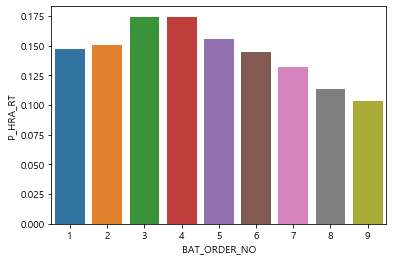

In [22]:
# 타율 평균의 분포, 3,4번타자가 확실히 타율이 높은 모습.
sns.barplot(x='BAT_ORDER_NO',y='P_HRA_RT',data=hitter_all.groupby(['BAT_ORDER_NO'])['P_HRA_RT'].mean().reset_index())

In [31]:
df=hitter_all.groupby(['P_ID'])['P_HRA_RT','BAT_ORDER_NO'].mean().reset_index()

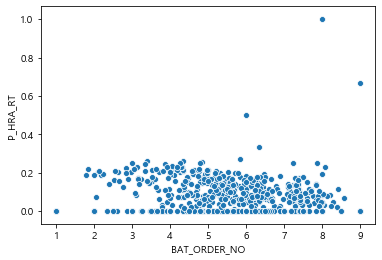

In [36]:
sns.scatterplot(x='BAT_ORDER_NO',y='P_HRA_RT',data=df)
#평균적인 타순 대비 평균 득점권 타율이 높은 이상치들이 존재


In [38]:
df[(df['BAT_ORDER_NO']>7.5) & (df['P_HRA_RT']>0.5)]

,P_ID,P_HRA_RT,BAT_ORDER_NO
134,62927,0.666667,9.0
696,97109,1.000000,8.0


In [41]:
hitter_all.query('P_ID==62927')
#17년도에 3번정도밖에 안뛴 선수 => 이상치로 간주하고 제거

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,BAT_ORDER_NO,PA,...,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
4448,20170513NCKT0,20170513,NC,KT,0,T,62927,0,9,2,...,0,0,0,0,0,0,0,1.0,1,1
4566,20170514NCKT0,20170514,NC,KT,0,T,62927,1,9,4,...,0,0,0,0,1,2,1,0.0,0,0
6287,20170531HTNC0,20170531,NC,HT,0,B,62927,0,9,1,...,0,0,0,0,0,0,0,1.0,1,1


In [42]:
hitter_all.query('P_ID==97109')
#마찬가지로 16년도에 딱 한번 치고 득점권 타율이 1인 선수=> 이상치로 간주하고 제거

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,BAT_ORDER_NO,PA,...,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
18594,20161008OBLG0,20161008,LG,OB,0,B,97109,0,8,1,...,0,0,0,0,0,0,1,1.0,1,1


In [47]:
#30경기 이상,타율 높은 몇몇 선수들의 타율의 흐름 살피기.

hitter_all.groupby(['P_ID'])['AVG'].mean().sort_values(ascending=False)

P_ID
69992    1.0
78148    1.0
97109    1.0
77263    1.0
66162    1.0
        ... 
97541    NaN
99314    NaN
99445    NaN
99563    NaN
99737    NaN
Name: AVG, Length: 707, dtype: float64

In [68]:
over_30_dict=(hitter_all['P_ID'].value_counts()>30).to_dict()

In [70]:
df1=hitter_all[hitter_all['P_ID'].map(over_30_dict)]

In [73]:
df1.groupby(['P_ID'])['AVG'].mean().sort_values(ascending=False)

P_ID
69209    0.345994
67207    0.343333
79215    0.332557
62907    0.332368
72443    0.331014
           ...   
67539    0.093886
63448    0.093333
62406    0.092105
63339    0.083333
67893    0.083333
Name: AVG, Length: 351, dtype: float64

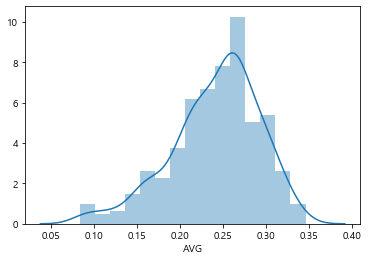

In [76]:
#30번 이상 친 선수들의 평균 타율의 분포 살피고 상위 20퍼의 타율을 보유한 선수들이 각각 어디 팀에 속하는지
#살펴보자.
sns.distplot(df1.groupby(['P_ID'])['AVG'].mean())

In [81]:
df1.groupby(['P_ID'])['AVG'].mean().quantile(q=0.9)
#타율이 0.3이상이면 상위 10퍼의 선수

0.30060975609756085

In [106]:
df_AVG_mean=df1.groupby(['P_ID'])['AVG'].agg([('AVG_mean','mean')]).reset_index()
df_AVG_mean

,P_ID,AVG_mean
0,50165,0.294540
1,50202,0.186275
2,50458,0.322807
3,50468,0.249612
4,50506,0.257258
...,...,...
346,95158,0.203333
347,95436,0.292674
348,98144,0.161842
349,99606,0.294606


In [108]:
#타율 상위 10퍼센트 선수의 선수코드 목록
lst=df_AVG_mean[df_AVG_mean['AVG_mean']>0.3]['P_ID'].to_list()
lst

[50458,
 50854,
 61353,
 62404,
 62907,
 62947,
 64699,
 64914,
 66740,
 67025,
 67207,
 67341,
 67650,
 68050,
 68103,
 68345,
 69150,
 69209,
 69652,
 70410,
 71564,
 71752,
 72133,
 72443,
 74163,
 74339,
 76232,
 76290,
 76304,
 76313,
 76849,
 77463,
 77532,
 78168,
 78224,
 78513,
 78603,
 79215,
 79453,
 79608,
 94629,
 99810]

In [133]:
#경기별 상위 10퍼센트 선수들의 타율의 평균=> 나중에 피쳐로 추가해보기
hitter_all.set_index(hitter_all['P_ID']).loc[lst].groupby(['G_ID','T_ID'])['AVG'].mean().to_dict()
#주의!  ('20160702SKLG0', 'SK'): nan

{('20160401HHLG0', 'HH'): 0.25,
 ('20160401HHLG0', 'LG'): 0.0,
 ('20160401HTNC0', 'HT'): 0.25,
 ('20160401HTNC0', 'NC'): 0.25,
 ('20160401KTSK0', 'KT'): 0.4583333333333333,
 ('20160401KTSK0', 'SK'): 0.75,
 ('20160401LTWO0', 'LT'): 0.25,
 ('20160401LTWO0', 'WO'): 0.19444444444444442,
 ('20160401OBSS0', 'OB'): 0.4583333333333333,
 ('20160401OBSS0', 'SS'): 0.25,
 ('20160402HHLG0', 'HH'): 0.25,
 ('20160402HHLG0', 'LG'): 0.5,
 ('20160402HTNC0', 'HT'): 0.45,
 ('20160402HTNC0', 'NC'): 0.125,
 ('20160402KTSK0', 'KT'): 0.1,
 ('20160402KTSK0', 'SK'): 0.25,
 ('20160402LTWO0', 'LT'): 0.475,
 ('20160402LTWO0', 'WO'): 0.1111111111111111,
 ('20160402OBSS0', 'OB'): 0.2,
 ('20160402OBSS0', 'SS'): 0.5,
 ('20160403KTSK0', 'KT'): 0.6666666666666666,
 ('20160403KTSK0', 'SK'): 0.0,
 ('20160403LTWO0', 'LT'): 0.225,
 ('20160403LTWO0', 'WO'): 0.3611111111111111,
 ('20160405LGHT0', 'HT'): 0.0,
 ('20160405LGHT0', 'LG'): 0.0,
 ('20160405NCOB0', 'NC'): 0.15,
 ('20160405NCOB0', 'OB'): 0.0,
 ('20160405SKLT0', 'LT'):

G_ID           T_ID  AVG     
20160401HHLG0  HH    0.166667    1
                     0.333333    1
               LG    0.000000    1
20160401HTNC0  HT    0.000000    1
                     0.500000    1
                                ..
20200719OBHT0  OB    0.500000    2
                     0.000000    1
20200719WOSK0  SK    0.000000    2
               WO    0.000000    1
                     0.750000    1
Name: AVG, Length: 12367, dtype: int64

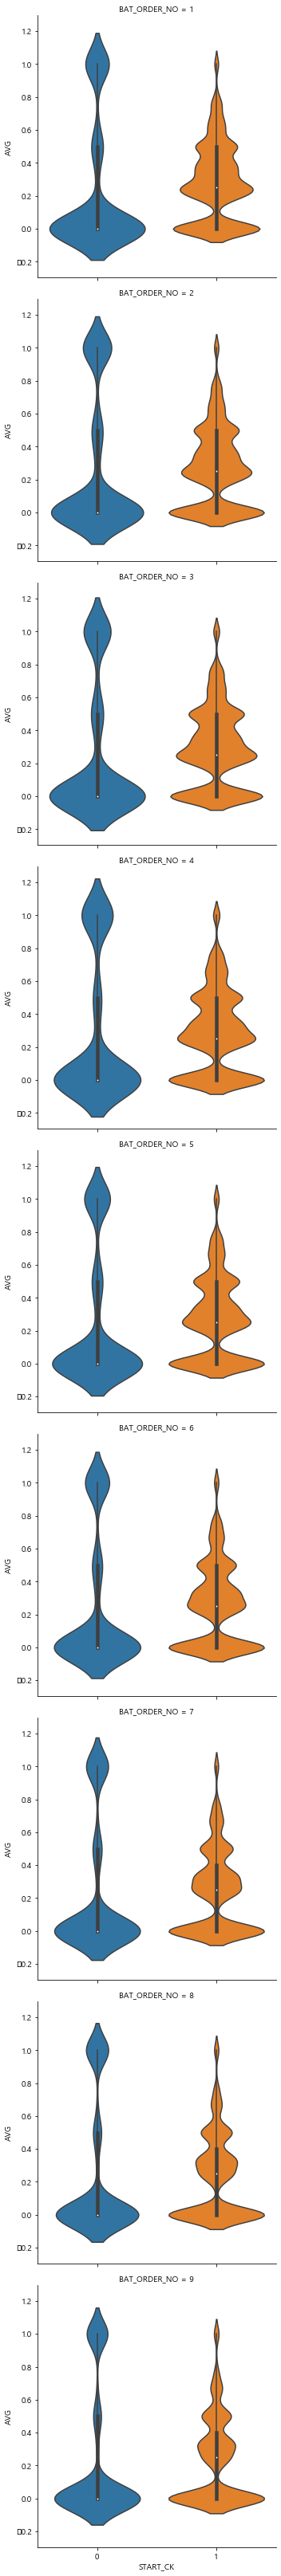

In [150]:
sns.factorplot(x='START_CK',y='AVG',row='BAT_ORDER_NO',data=hitter_all,kind='violin')
#선발 선수가 타율이 확실히 높은편

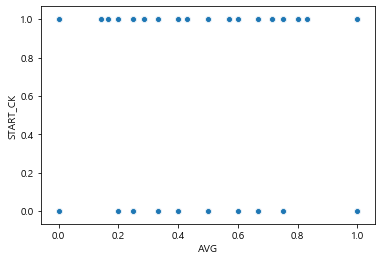

In [147]:
sns.scatterplot(x='AVG',y='START_CK',data=hitter_all)